In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv("/Users/duda/PythonDSA/Duda/9-Projeto8/3-Projeto8/dados/diabetic_data.csv")

In [3]:
dados.shape

(101766, 50)

In [4]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
dados.isna().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [7]:
dados.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                         True
gender                      False
age                         False
weight                       True
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty            True
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                       True
diag_2                       True
diag_3                       True
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

In [8]:
dados.isin(['?']).sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [9]:
# Verificando valores únicos
for col in list(dados.columns):
    
    # Obtém uma lista de valores únicos
    list_of_unique_values = dados[col].unique()
    
    # Se o número de valores exclusivos for menor que 20, imprima os valores. 
    # Caso contrário, imprima o número de valores exclusivos
    if len(list_of_unique_values) < 20:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')
        print(list_of_unique_values)
    else:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')



encounter_id: 101766 valores únicos


patient_nbr: 71518 valores únicos


race: 6 valores únicos
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


gender: 3 valores únicos
['Female' 'Male' 'Unknown/Invalid']


age: 10 valores únicos
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


weight: 10 valores únicos
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


admission_type_id: 8 valores únicos
[6 1 2 3 4 5 8 7]


discharge_disposition_id: 26 valores únicos


admission_source_id: 17 valores únicos
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]


time_in_hospital: 14 valores únicos
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


payer_code: 18 valores únicos
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']


medical_specialty: 73 valores únicos


num_lab_procedures: 118 valores únicos


num_procedures: 7 valores únicos


In [10]:
# Percentual '?' por coluna

for col in dados.columns:
    if dados[col].dtype == object:
        if dados[col][dados[col] == '?'].count() > 0:
            print('\nColuna', col, 'tem', dados[col][dados[col] == '?'].count(), 'valores com o caracter "?"')
            print('Isso representa', round(dados[col][dados[col] == '?'].count() / len(dados.index) * 100, 2), '% do total')


Coluna race tem 2273 valores com o caracter "?"
Isso representa 2.23 % do total

Coluna weight tem 98569 valores com o caracter "?"
Isso representa 96.86 % do total

Coluna payer_code tem 40256 valores com o caracter "?"
Isso representa 39.56 % do total

Coluna medical_specialty tem 49949 valores com o caracter "?"
Isso representa 49.08 % do total

Coluna diag_1 tem 21 valores com o caracter "?"
Isso representa 0.02 % do total

Coluna diag_2 tem 358 valores com o caracter "?"
Isso representa 0.35 % do total

Coluna diag_3 tem 1423 valores com o caracter "?"
Isso representa 1.4 % do total


In [11]:
for col in dados.columns:
    if dados[col].dtype == object:
        nan_count = dados[col].isna().sum()
        if nan_count > 0:
            print('\nColuna', col, 'tem', nan_count, 'valores NaN')
            print('Isso representa', round(nan_count / len(dados.index) * 100, 2), '% do total')


Coluna max_glu_serum tem 96420 valores NaN
Isso representa 94.75 % do total

Coluna A1Cresult tem 84748 valores NaN
Isso representa 83.28 % do total


In [12]:
print('\nColuna gender tem', dados['gender'][dados['gender'] == 'Unknown/Invalid'].count(), 'valores com "Unknown/Invalid"')
print('Isso representa', round(dados['gender'][dados['gender'] == 'Unknown/Invalid'].count() / len(dados.index) * 100, 2), '% do total')


Coluna gender tem 3 valores com "Unknown/Invalid"
Isso representa 0.0 % do total


In [13]:
dados = dados.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1)

In [14]:
dados.A1Cresult = dados.A1Cresult.fillna('None')

In [15]:
dados.max_glu_serum = dados.max_glu_serum.fillna('None')

In [16]:
dados = dados[dados['race'] != '?']
dados = dados[dados['diag_1'] != '?']
dados = dados[dados['diag_2'] != '?']
dados = dados[dados['diag_3'] != '?']
dados = dados[dados['gender'] != 'Unknown/Invalid']

In [17]:
dados.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide   

In [18]:
dados.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [19]:
dados.shape

(98052, 47)

In [20]:
dados.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,28236,89869032,AfricanAmerican,Female,[40-50),1,1,7,9,47,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [21]:
# Checando por variáveis com um único valor
dados.loc[:, dados.nunique() == 1]

,examide,citoglipton,metformin-rosiglitazone
1,No,No,No
2,No,No,No
3,No,No,No
4,No,No,No
5,No,No,No
...,...,...,...
101761,No,No,No
101762,No,No,No
101763,No,No,No
101764,No,No,No


In [22]:
# Removendoo variáveis com valores únicos (constantes)

dados = dados.loc[:, dados.nunique() != 1]

In [23]:
dados.shape

(98052, 44)

In [24]:
# Ajustando a Variável Alvo Para Estratificação de Risco

dados.readmitted.value_counts()

readmitted
NO     52337
>30    34649
<30    11066
Name: count, dtype: int64

In [25]:
dados_clean1 = dados

In [26]:
dados.readmitted = dados.readmitted.replace('>30', 1)
dados.readmitted = dados.readmitted.replace('<30', 1)
dados.readmitted = dados.readmitted.replace('NO', 0)

/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_4447/2357628250.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados.readmitted = dados.readmitted.replace('NO', 0)


In [27]:
dados.readmitted.unique()

array([1, 0])

In [28]:
dados.readmitted.dtype

dtype('int64')

In [29]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,1


In [30]:
# Proporcao

round(dados.readmitted.value_counts() / len(dados.index) * 100, 0)

readmitted
0    53.0
1    47.0
Name: count, dtype: float64

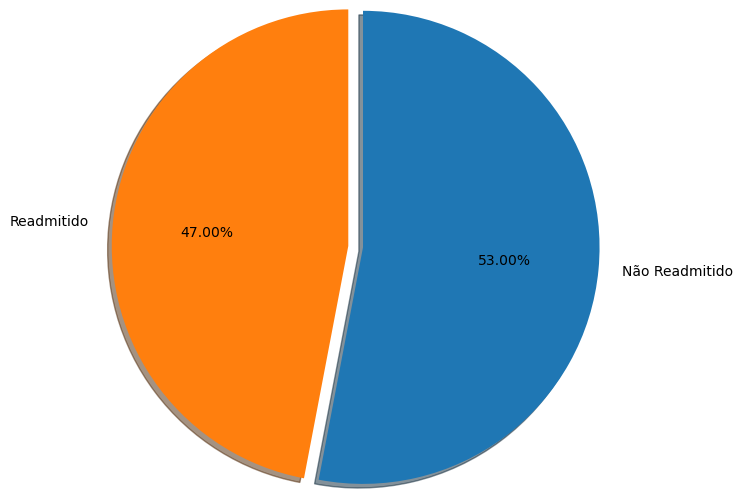

In [31]:
# Percentual
percentual = round(dados.readmitted.value_counts() / len(dados.index) * 100, 0)

labels = ['Não Readmitido', 'Readmitido']

# Plot
plt.axis("equal")
plt.pie(percentual , 
        labels = labels,
        radius = 1.6,
        autopct = '%1.2f%%',
        explode = [0.05,0.05],
        startangle = 90,
        shadow = True,
        counterclock = False,
        pctdistance = 0.6)
plt.show()

In [32]:
# Recategorizacao

dados.age.dtype

dtype('O')

In [33]:
dados.groupby('age').size()

age
[0-10)         65
[10-20)       466
[20-30)      1478
[30-40)      3548
[40-50)      9265
[50-60)     16697
[60-70)     21809
[70-80)     25305
[80-90)     16702
[90-100)     2717
dtype: int64

Text(0, 0.5, 'Count')

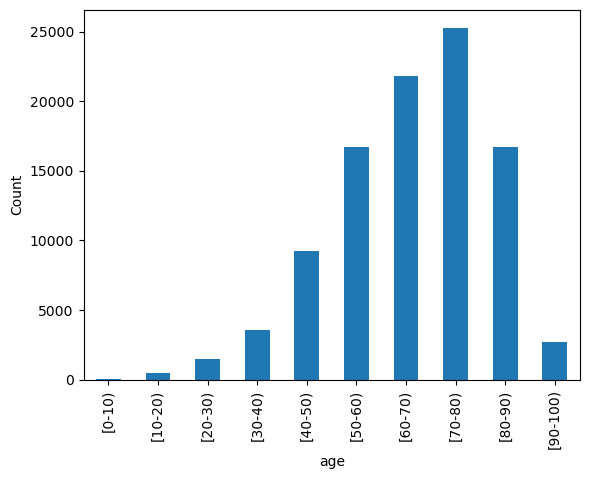

In [34]:
dados.groupby('age').size().plot(kind = 'bar')
plt.ylabel('Count')

In [35]:
# Recategorizamos 'idade' para que a população seja distribuída de maneira mais uniforme

# Classificamos como faixa de 0-50 pacientes de até 50 anos
dados['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val 
                          for val in dados['age']], index = dados.index)

# Acima de 80 anos ficam na faixa de 80-100
dados['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                          for val in dados['age']], index = dados.index)

# As outras faixas são mantidas

Text(0, 0.5, 'Count')

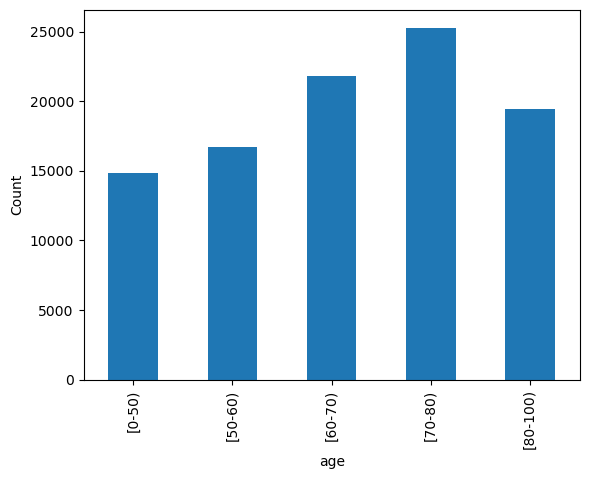

In [36]:
dados.groupby('age').size().plot(kind = 'bar')
plt.ylabel('Count')

In [37]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[0-50),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[0-50),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[0-50),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[0-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,1


In [38]:
# simplificando IDs

dados.admission_type_id.unique()

array([1, 2, 3, 6, 4, 5, 8, 7])

In [39]:
# A variável 'admission_type_id' contém 8 níveis
# Reduziremos os níveis de 'admission_type_id' para duas categorias
dados['admission_type_id'] = pd.Series(['Emergencia' if val == 1 else 'Outro' 
                                        for val in dados['admission_type_id']], index = dados.index)

In [40]:
dados.admission_type_id.nunique()

2

In [41]:
dados.admission_type_id.value_counts()

admission_type_id
Emergencia    52178
Outro         45874
Name: count, dtype: int64

In [42]:
dados.discharge_disposition_id.unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [43]:
# A variável 'discharge_disposition_id' contém 26 níveis
# Reduziremos os níveis de 'discharge_disposition_id' para duas categorias
dados['discharge_disposition_id'] = pd.Series(['Casa' if val == 1 else 'Outro' 
                                              for val in dados['discharge_disposition_id']], index = dados.index)

In [44]:
dados.discharge_disposition_id.nunique()

2

In [45]:
dados.discharge_disposition_id.value_counts()

discharge_disposition_id
Casa     57609
Outro    40443
Name: count, dtype: int64

In [46]:
dados.admission_source_id.unique()

array([ 7,  2,  4,  1,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [47]:
# A variável 'admission_source_id' contém 17 níveis
# # Reduziremos os níveis de 'admission_source_id' para três categorias
dados['admission_source_id'] = pd.Series(['Sala_Emergencia' if val == 7 else 'Recomendacao' if val == 1 else 'Outro' 
                                              for val in dados['admission_source_id']], index = dados.index)

In [48]:
dados.admission_source_id.nunique()

3

In [49]:
dados.admission_source_id.value_counts()

admission_source_id
Sala_Emergencia    55951
Recomendacao       28355
Outro              13746
Name: count, dtype: int64

In [50]:
# Calculando comorbidade, reduziremos esses códigos de diagnóstico para 4 categorias.

diagnostico = dados[['diag_1', 'diag_2', 'diag_3']]

In [51]:
diagnostico.head(10)

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486
10,250.7,403,996


In [52]:
# Vamos aplicar expressões regulares para buscar por um padrão e por isso precisamos do pacote re
import re

In [53]:
def calcula_comorbidade(row):
    
    # Código 250 indica diabetes
    codigos_doenca_diabetes = "^[2][5][0]"
    
    # Códigos 39x (x = valor entre 0 e 9)
    # Códigos 4zx (z = valor entre 0 e 6 e x = valor entre 0 e 9)
    # Esses códigos indicam problemas circulatórios
    codigos_doenca_circulatorios = "^[3][9][0-9]|^[4][0-5][0-9]"
    
    # Inicializa variável de retorno
    valor = 0
    
    # Valor 0 indica que:
    # Diabetes e problemas circulatórios não foram detectados de forma simultânea no paciente
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and 
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))):
        valor = 0
        
    # Valor 1 indica que:
    # Pelo menos um diagnóstico de diabetes e problemas circulatórios foram detectados de forma 
    # simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))): 
        valor = 1
        
    # Valor 2 indica que:
    # Diabetes e pelo menos um diagnóstico de problemas circulatórios foram detectados de forma 
    # simultânea no paciente
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and 
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 2
        
    # Valor 3 indica que:
    # Pelo menos um diagnóstico de diabetes e pelo menos um diagnóstico de problemas circulatórios 
    # foram detectados de forma simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 3 
    
    return valor

In [54]:
dados['comorbidade'] = diagnostico.apply(calcula_comorbidade, axis = 1)

In [55]:
dados.shape

(98052, 45)

In [56]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,No,Up,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,No,Up,No,No,No,No,Ch,Yes,0,3
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,No,Steady,No,No,No,No,No,Yes,1,3


In [57]:
dados.comorbidade.unique()

array([1, 3, 2, 0])

In [58]:
dados['comorbidade'].value_counts()

comorbidade
2    39551
0    22645
1    18192
3    17664
Name: count, dtype: int64

In [59]:
dados.drop(['diag_1','diag_2','diag_3'], axis = 1, inplace = True)

In [60]:
percent_com = pd.crosstab(dados.comorbidade , dados.readmitted , normalize = 'index') * 100
percent_com

readmitted,0,1
comorbidade,,
0,55.526606,44.473394
1,53.875330,46.124670
2,51.748376,48.251624
3,53.753397,46.246603


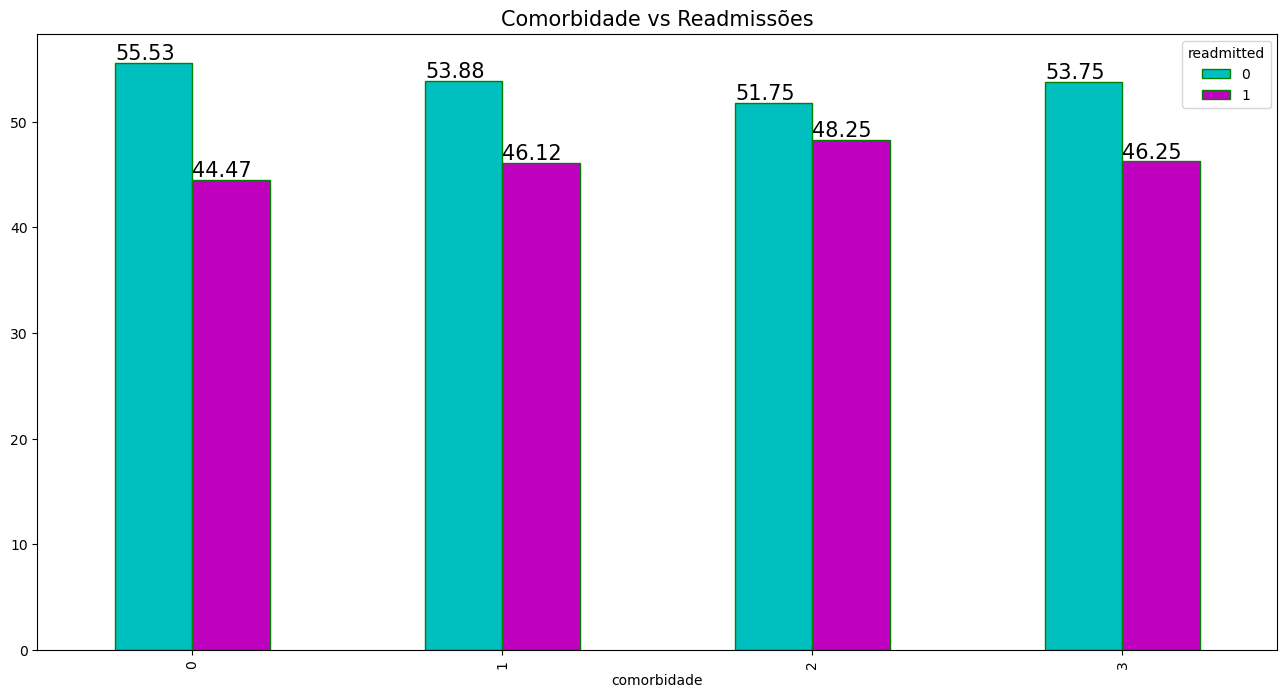

In [61]:
fig = percent_com.plot(kind = 'bar', 
                       figsize = (16, 8), 
                       width = 0.5, 
                       edgecolor = 'g', 
                       color = ['c','m'])
# Desenha cada grupo
for i in fig .patches:
    fig.text(i.get_x() + 0.00, 
             i.get_height() + 0.3, 
             str(round((i.get_height()), 2)), 
             fontsize = 15, 
             color = 'black',
             rotation = 0)

plt.title("Comorbidade vs Readmissões", fontsize = 15)
plt.show()

In [62]:
# Legenda do gráfico:

# Valor 0 indica que:
# Diabetes e problemas circulatórios não foram detectados de forma simultânea no paciente

# Valor 1 indica que:
# Pelo menos um diagnóstico de diabetes E problemas circulatórios foram detectados de forma simultânea no paciente

# Valor 2 indica que:
# Diabetes e pelo menos um diagnóstico de problemas circulatórios foram detectados de forma simultânea no paciente

# Valor 3 indica que:
# Pelo menos um diagnóstico de diabetes e pelo menos um dianóstico de problemas circulatórios foram detectados de 
# forma simultânea no paciente

Text(0, 0.5, 'Count')

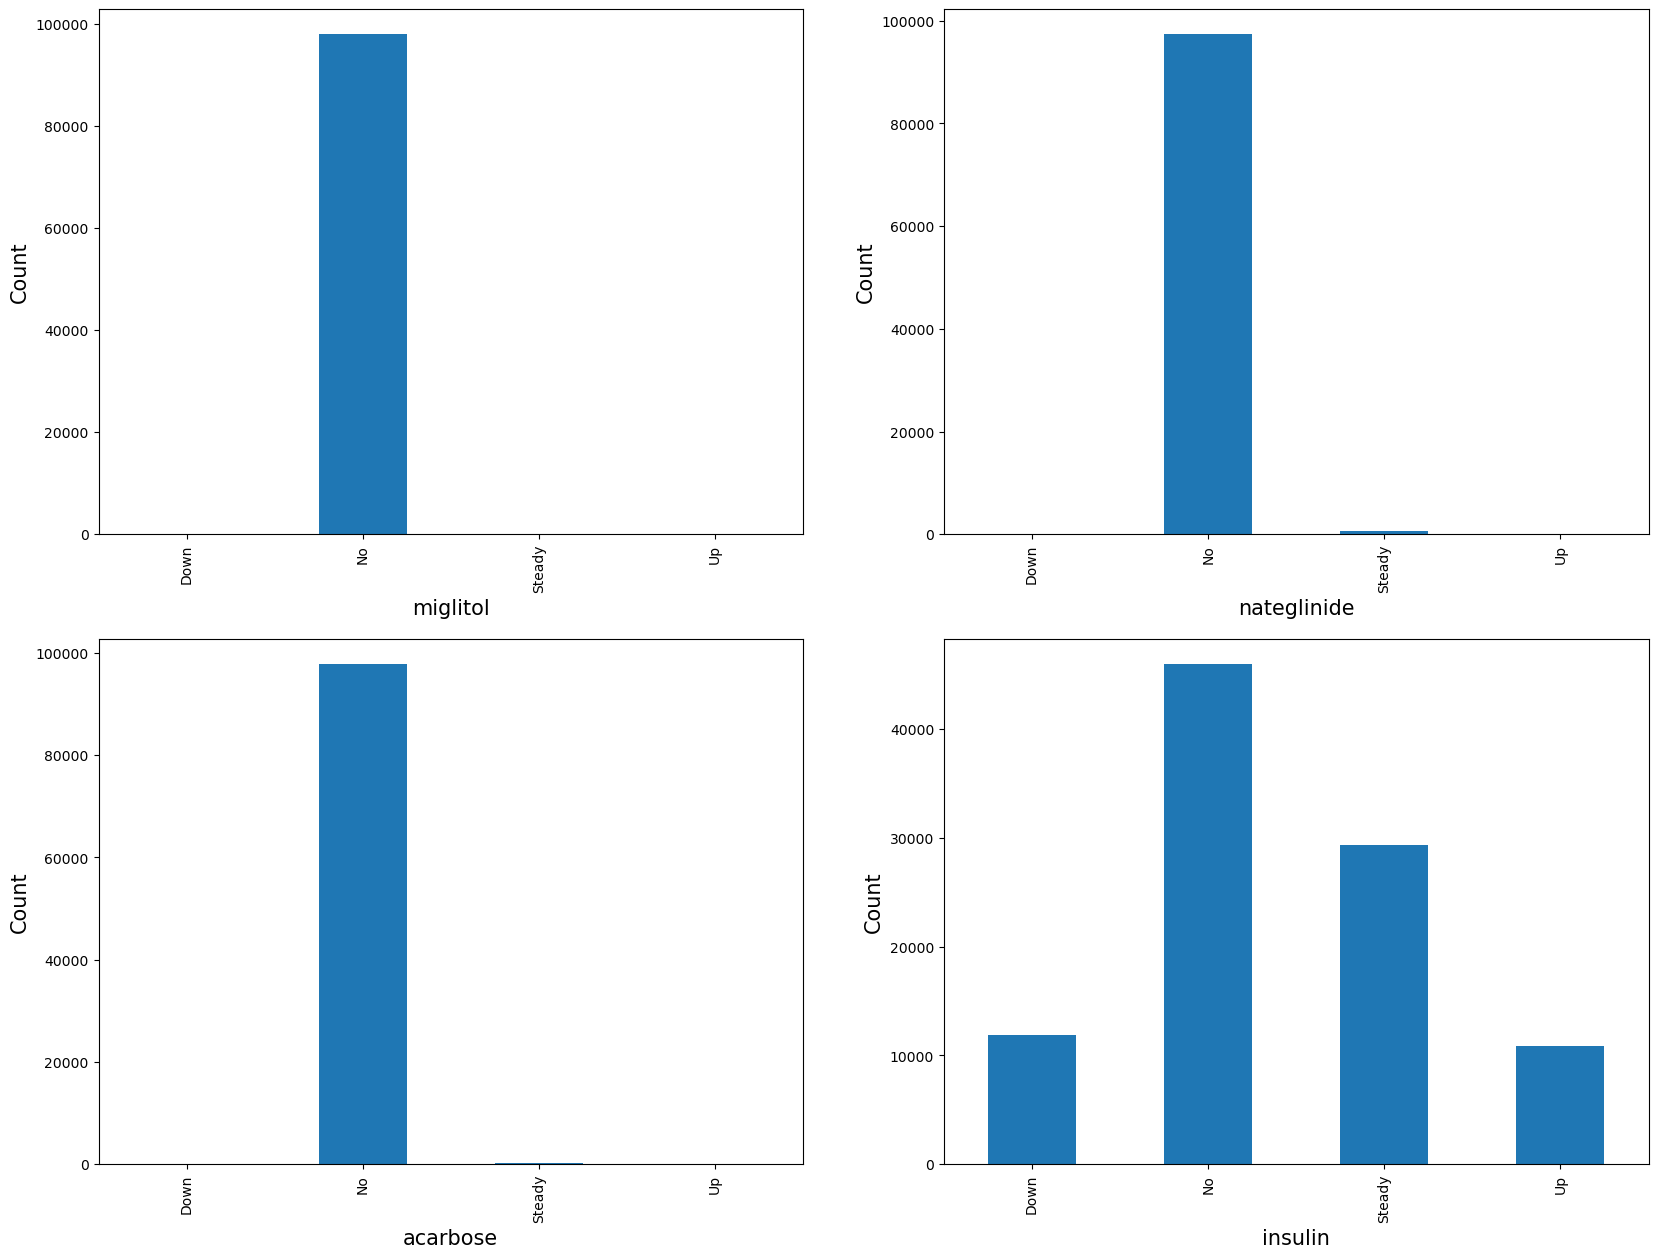

In [63]:
# Simplificando colunas de medicamentos -> foi ou nao alterado

# Plot
fig = plt.figure(figsize = (20,15))

ax1 = fig.add_subplot(221)
ax1 = dados.groupby('miglitol').size().plot(kind = 'bar')
plt.xlabel('miglitol', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax2 = fig.add_subplot(222)
ax2 = dados.groupby('nateglinide').size().plot(kind = 'bar')
plt.xlabel('nateglinide', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax3 = fig.add_subplot(223)
ax3 = dados.groupby('acarbose').size().plot(kind = 'bar')
plt.xlabel('acarbose', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax4 = fig.add_subplot(224)
ax4 = dados.groupby('insulin').size().plot(kind = 'bar')
plt.xlabel('insulin', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

In [64]:
dados.shape

(98052, 42)

In [65]:
dados.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'comorbidade'],
      dtype='object')

In [66]:
medicamentos = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
                'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
                'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [67]:
# Loop para ajustar o valor das variáveis
for col in medicamentos:
    if col in dados.columns:
        colname = str(col) + 'temp'
        dados[colname] = dados[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

In [68]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,rosiglitazonetemp,acarbosetemp,miglitoltemp,troglitazonetemp,tolazamidetemp,insulintemp,glyburide-metformintemp,glipizide-metformintemp,glimepiride-pioglitazonetemp,metformin-pioglitazonetemp
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,0,0,0,0,1,0,0,0,0
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,0,0,0,0,0,0,0,0,0,0
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,0,0,0,0,1,0,0,0,0
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,0,0,0,0,0,0,0,0,0
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# Cria uma variável para receber a contagem por paciente
dados['num_alt_dosagem_med'] = 0

In [70]:
# Contagem de modificações na dosagem de medicamentos
for col in medicamentos:
    if col in dados.columns:
        colname = str(col) + 'temp'
        dados['num_alt_dosagem_med'] = dados['num_alt_dosagem_med'] + dados[colname]
        del dados[colname]

In [71]:
dados.num_alt_dosagem_med.value_counts()

num_alt_dosagem_med
0    71309
1    25350
2     1281
3      107
4        5
Name: count, dtype: int64

In [72]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,Up,No,No,No,No,Ch,Yes,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,No,No,No,No,No,No,Yes,0,1,0
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,Up,No,No,No,No,Ch,Yes,0,3,1
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,Steady,No,No,No,No,Ch,Yes,0,1,0
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,Steady,No,No,No,No,No,Yes,1,3,0


In [73]:
# Medicamentos por paciente

for col in medicamentos:
    if col in dados.columns:
        dados[col] = dados[col].replace('No', 0)
        dados[col] = dados[col].replace('Steady', 1)
        dados[col] = dados[col].replace('Up', 1)
        dados[col] = dados[col].replace('Down', 1) 

/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_4447/1631184047.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados[col] = dados[col].replace('Down', 1)
/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_4447/1631184047.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados[col] = dados[col].replace('Steady', 1)
/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_4447/1631184047.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain

In [74]:
dados['num_med'] = 0

In [75]:
for col in medicamentos:
    if col in dados.columns:
        dados['num_med'] = dados['num_med'] + dados[col]

In [76]:
dados['num_med'].value_counts()

num_med
1    45447
0    22702
2    21056
3     7485
4     1300
5       57
6        5
Name: count, dtype: int64

In [77]:
# Remove as colunas de medicamentos
dados = dados.drop(columns = medicamentos)

In [78]:
dados.shape

(98052, 24)

In [79]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,None,None,Ch,Yes,1,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,None,None,No,Yes,0,1,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,None,None,Ch,Yes,0,3,1,1
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,None,None,Ch,Yes,0,1,0,2
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,0,9,None,None,No,Yes,1,3,0,1


In [80]:
dados.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
change                      object
diabetesMed                 object
readmitted                   int64
comorbidade                  int64
num_alt_dosagem_med          int64
num_med                      int64
dtype: object

In [81]:
# Recoding de algumas variáveis categóricas

dados['change'].value_counts()

change
No    52774
Ch    45278
Name: count, dtype: int64

In [82]:
dados['gender'].value_counts()

gender
Female    52833
Male      45219
Name: count, dtype: int64

In [83]:
dados['diabetesMed'].value_counts()

diabetesMed
Yes    75350
No     22702
Name: count, dtype: int64

In [84]:
dados['change'] = dados['change'].replace('Ch', 1)
dados['change'] = dados['change'].replace('No', 0)
dados['gender'] = dados['gender'].replace('Male', 1)
dados['gender'] = dados['gender'].replace('Female', 0)
dados['diabetesMed'] = dados['diabetesMed'].replace('Yes', 1)
dados['diabetesMed'] = dados['diabetesMed'].replace('No', 0)

/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_4447/44080164.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['change'] = dados['change'].replace('No', 0)
/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_4447/44080164.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['gender'] = dados['gender'].replace('Female', 0)
/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_4447/44080164.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versio

In [85]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,None,None,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,None,None,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,None,None,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,None,None,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,None,None,0,1,1,3,0,1


In [86]:
dados['A1Cresult'].value_counts()

A1Cresult
None    81859
>8       7631
Norm     4854
>7       3708
Name: count, dtype: int64

In [87]:
dados['max_glu_serum'].value_counts()

max_glu_serum
None    92844
Norm     2532
>200     1449
>300     1227
Name: count, dtype: int64

In [88]:
dados['A1Cresult'] = dados['A1Cresult'].replace('>7', 1)
dados['A1Cresult'] = dados['A1Cresult'].replace('>8', 1)
dados['A1Cresult'] = dados['A1Cresult'].replace('Norm', 0)
dados['A1Cresult'] = dados['A1Cresult'].replace('None', -99)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('>200', 1)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('>300', 1)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('Norm', 0)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('None', -99)

/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_4447/266842975.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['A1Cresult'] = dados['A1Cresult'].replace('None', -99)
/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_4447/266842975.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['max_glu_serum'] = dados['max_glu_serum'].replace('None', -99)


In [89]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,-99,-99,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,-99,-99,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,-99,-99,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,-99,-99,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99,-99,0,1,1,3,0,1


In [90]:
# Deixando apenas o primeiro encontro/consulta de cada paciente

dados = dados.drop_duplicates(subset = ['patient_nbr'], keep = 'first')

In [91]:
dados.shape

(68629, 24)

In [92]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,-99,-99,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,-99,-99,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,-99,-99,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,-99,-99,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99,-99,0,1,1,3,0,1


In [93]:
dados.to_csv('/Users/duda/PythonDSA/Duda/9-Projeto8/3-Projeto8/dados/dados_parte1.csv', index = False)

In [94]:
dados = pd.read_csv("/Users/duda/PythonDSA/Duda/9-Projeto8/3-Projeto8/dados/dados_parte1.csv")

In [95]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,-99,-99,1,1,1,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,-99,-99,0,1,0,1,0,1
2,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,-99,-99,1,1,0,3,1,1
3,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,-99,-99,1,1,0,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99,-99,0,1,1,3,0,1


In [96]:
dados.shape

(68629, 24)

In [97]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68629 entries, 0 to 68628
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              68629 non-null  int64 
 1   patient_nbr               68629 non-null  int64 
 2   race                      68629 non-null  object
 3   gender                    68629 non-null  int64 
 4   age                       68629 non-null  object
 5   admission_type_id         68629 non-null  object
 6   discharge_disposition_id  68629 non-null  object
 7   admission_source_id       68629 non-null  object
 8   time_in_hospital          68629 non-null  int64 
 9   num_lab_procedures        68629 non-null  int64 
 10  num_procedures            68629 non-null  int64 
 11  num_medications           68629 non-null  int64 
 12  number_outpatient         68629 non-null  int64 
 13  number_emergency          68629 non-null  int64 
 14  number_inpatient      

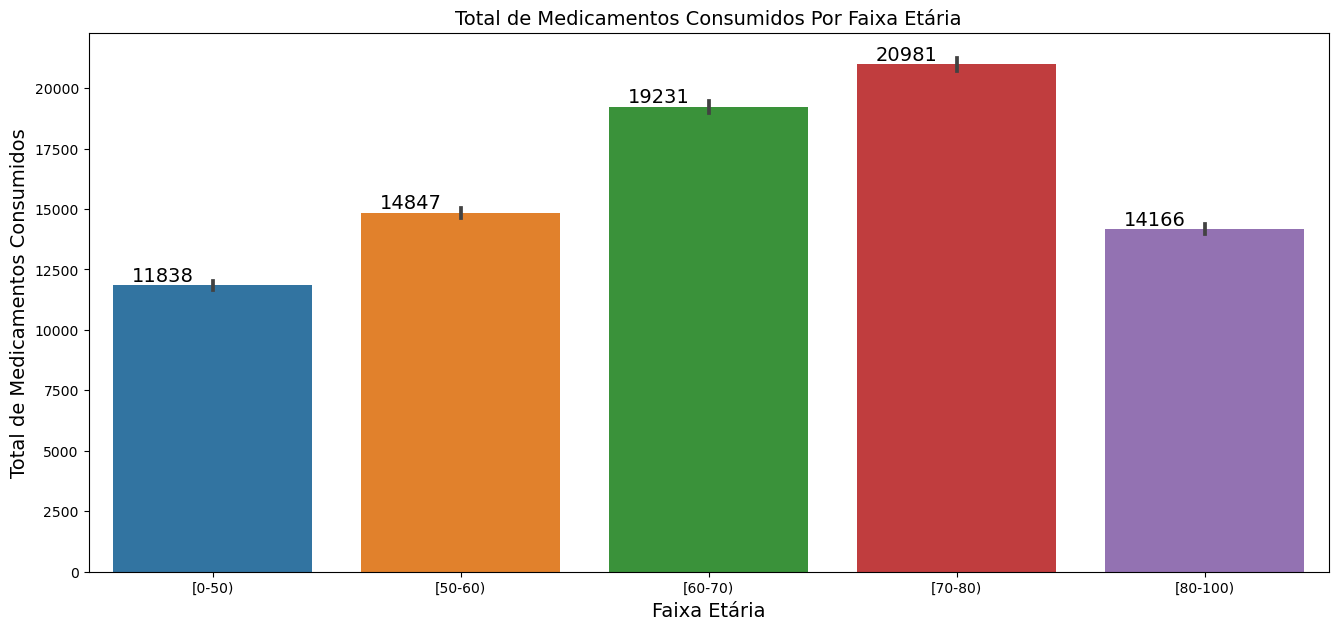

In [98]:
# 1- Total de Medicamentos Consumidos Por Faixa Etária

plt.figure(figsize = (16,7))

figx = sns.barplot(x = 'age', y = 'num_med', estimator = np.sum, data = dados)

plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

plt.ylabel("Total de Medicamentos Consumidos", fontsize = 14, color = 'black')

plt.title("Total de Medicamentos Consumidos Por Faixa Etária", fontsize = 14, color = 'black')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


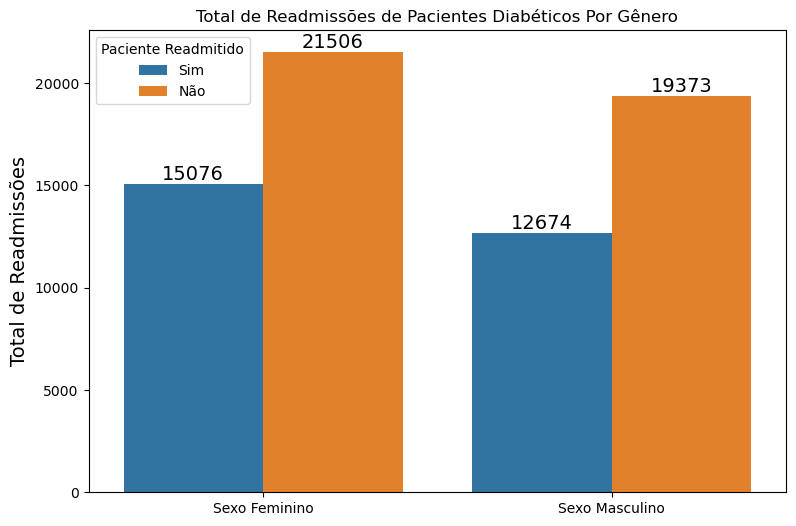

In [99]:
# 2- Total de Readmissões de Pacientes Diabéticos Por Gênero

# Criação de uma lista para os rótulos de gênero
gender_labels = ['Sexo Feminino' if x == 0 else 'Sexo Masculino' for x in dados['gender']]

# Criação do gráfico de barras com label encoding
figx = sns.countplot(x=gender_labels, hue=dados['readmitted'].map({0: 'Não', 1: 'Sim'}))

figx.figure.set_size_inches(9, 6)

figx.legend(title='Paciente Readmitido')

# Label do eixo y
plt.ylabel("Total de Readmissões", fontsize=14, color='black')

figx.axes.set_title('Total de Readmissões de Pacientes Diabéticos Por Gênero')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', 
                  va='bottom', 
                  fontsize=14,
                  color='black')

# Mostra o gráfico
plt.show()


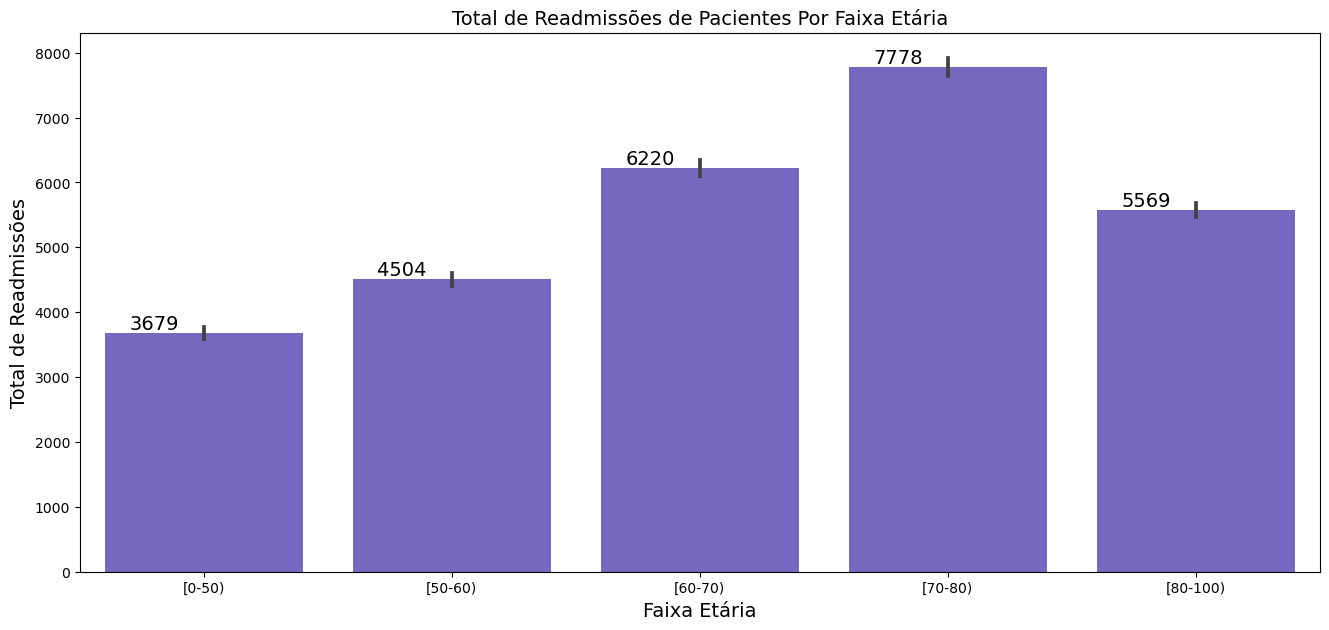

In [100]:
# 3- Total de Readmissões de Pacientes Por Faixa Etária

plt.figure(figsize = (16,7))

figx = sns.barplot(x = 'age', y = 'readmitted', estimator = np.sum, data = dados, color = 'slateblue')

plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

plt.title("Total de Readmissões de Pacientes Por Faixa Etária", fontsize = 14, color = 'black')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')

plt.show()

In [101]:
# 4- Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária

percentual_idade_readmissao = pd.crosstab(dados.age , dados.readmitted, margins = True, normalize = 'index') * 100
percentual_idade_readmissao

readmitted,0,1
age,,
[0-50),64.915125,35.084875
[50-60),62.463539,37.536461
[60-70),59.647074,40.352926
[70-80),55.912028,44.087972
[80-100),57.449572,42.550428
All,59.565198,40.434802


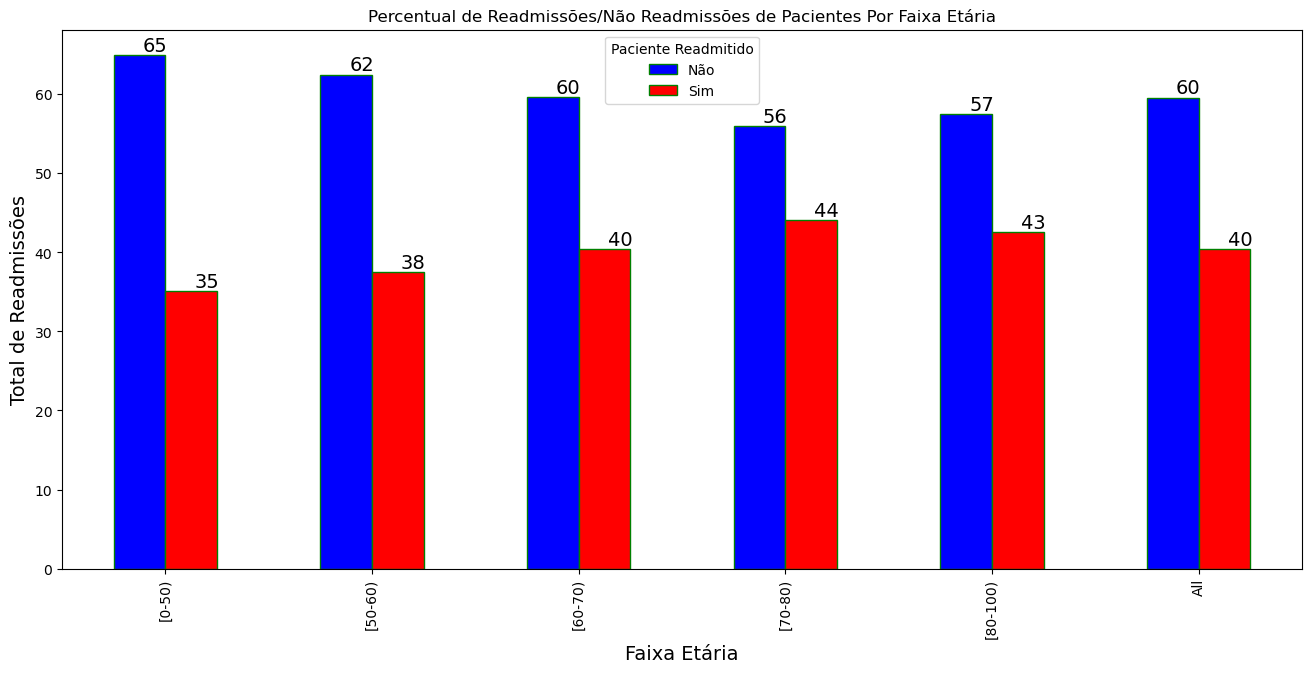

In [102]:
fig = percentual_idade_readmissao.plot(kind = 'bar', 
                                       figsize = (16, 7), 
                                       width = 0.5,
                                       edgecolor = 'g', 
                                       color = ['b', 'r'])

plt.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

plt.title("Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária", fontsize = 12)

for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.2, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

plt.show()

/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_4447/140802253.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x='age',


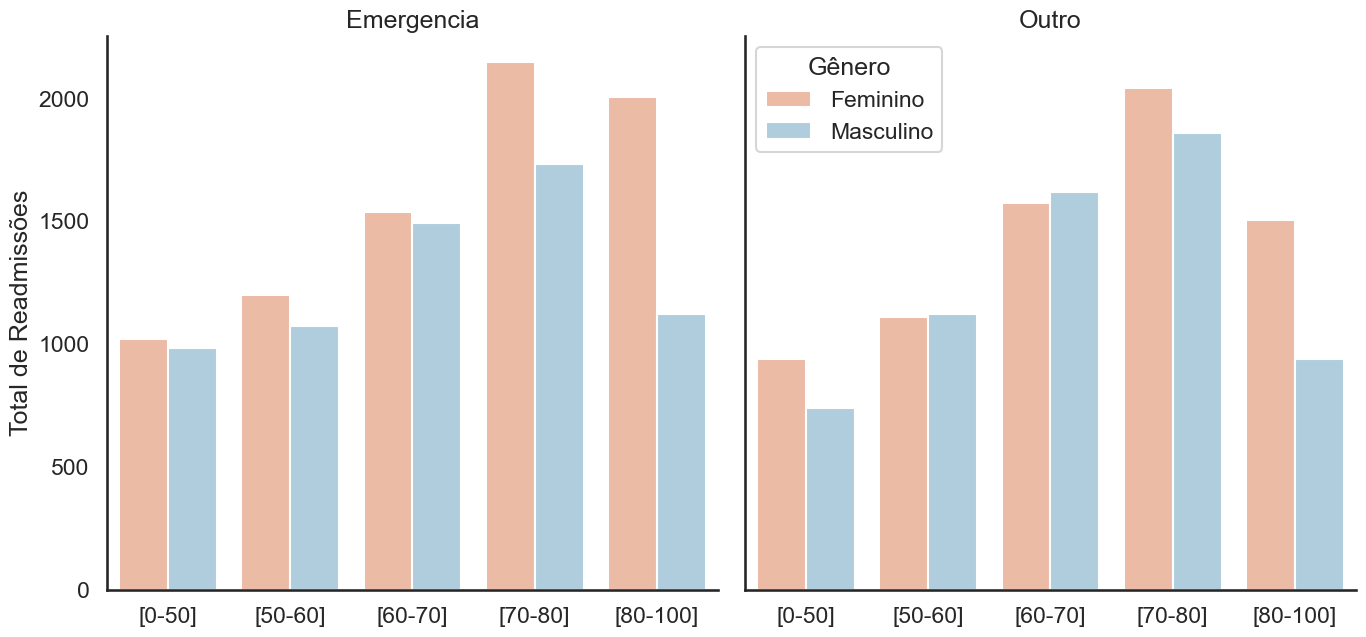

In [103]:
# 5- Total de Readmissões de Pacientes Por Gênero, Por Idade e Por Tipo de Admissão

# Mapear os rótulos de gênero diretamente na coluna 'gender'
dados['gender_labels'] = dados['gender'].apply(lambda x: 'Sexo Feminino' if x == 0 else 'Sexo Masculino')

# Vamos incluir o background
sns.set(style="white", context="talk")

# Criação do gráfico com sns.catplot()
g = sns.catplot(x='age', 
                y='readmitted', 
                hue='gender_labels',  # Usar a coluna mapeada 'gender_labels' aqui
                col='admission_type_id',
                estimator=np.sum, 
                data=dados, 
                palette="RdBu", 
                kind="bar",
                height=7, 
                aspect=1,
                legend=False,
                ci=None)

# Ajustar os rótulos e títulos
g.set_axis_labels("", "Total de Readmissões")
g.set_xticklabels(["[0-50]", "[50-60]", "[60-70]", "[70-80]", "[80-100]"])
g.set_titles("{col_name}")

# Configuração da legenda
plt.legend(title='Gênero', loc='upper left', labels=['Feminino', 'Masculino'])

plt.show()


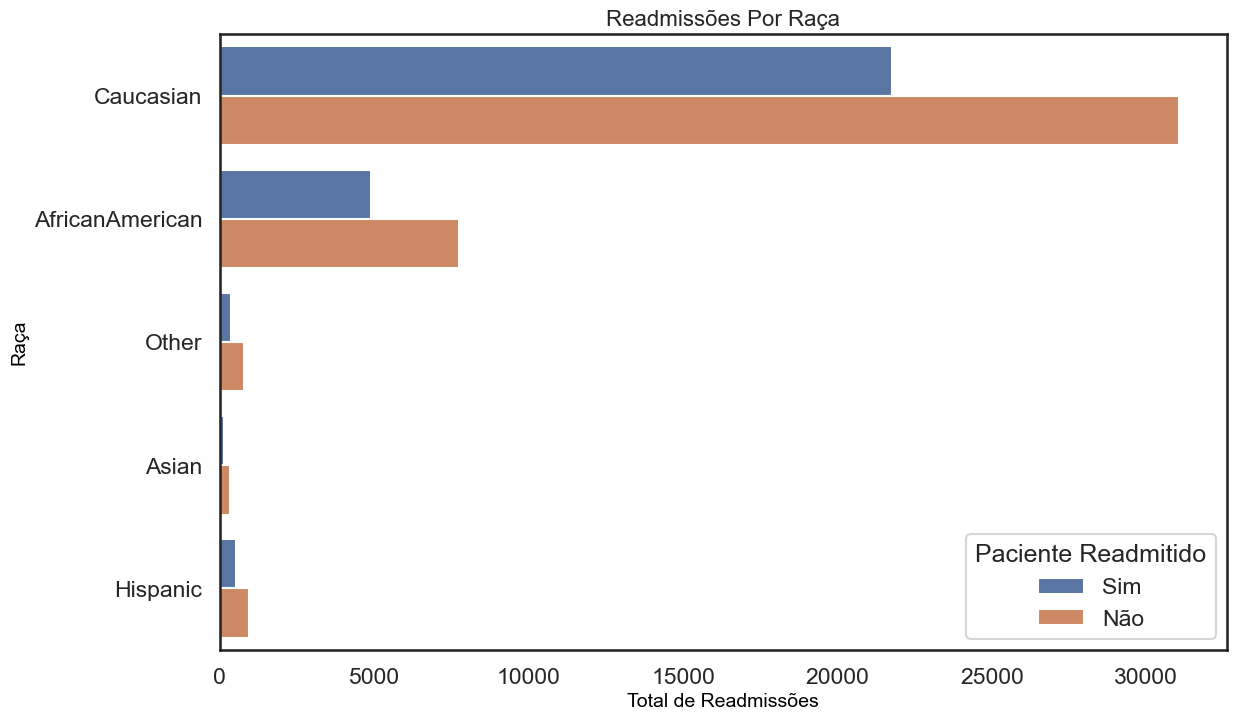

In [104]:
#  6- Total de Readmissões Por Raça

import seaborn as sns
import matplotlib.pyplot as plt

# Convertendo a coluna 'readmitted' para strings 'Não' e 'Sim'
dados['readmitted_str'] = dados['readmitted'].map({0: 'Não', 1: 'Sim'})

# Criação do gráfico com sns.countplot()
figx = sns.countplot(y='race', hue='readmitted_str', data=dados)

# Label do eixo x
plt.xlabel("Total de Readmissões", fontsize=14, color='black')

# Label do eixo y
plt.ylabel("Raça", fontsize=14, color='black')

# Tamanho do gráfico
figx.figure.set_size_inches(13, 8)

# Ajuste manual da legenda
plt.legend(title='Paciente Readmitido', loc='best')

# Título
plt.title('Readmissões Por Raça', fontsize=16)

# Mostra o gráfico
plt.show()



In [105]:
# 7- Número de Visitas x Comorbidade

num_visitas_comorbidade = pd.crosstab(dados.number_inpatient, dados.comorbidade).sum()
num_visitas_comorbidade

comorbidade
0    15483
1    13032
2    27076
3    13038
dtype: int64

In [106]:
type(num_visitas_comorbidade)

pandas.core.series.Series

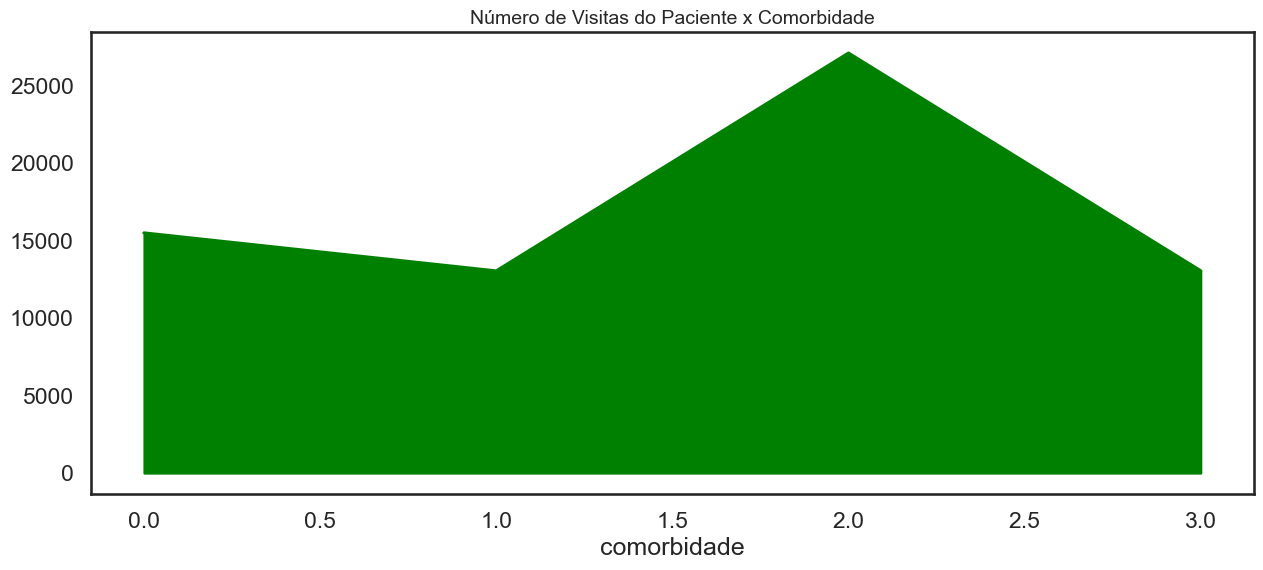

In [107]:
fig = num_visitas_comorbidade.plot(kind = 'area',
                                   figsize = (15,6),
                                   color = 'Green')

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.2, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

plt.title("Número de Visitas do Paciente x Comorbidade", fontsize = 14)
plt.show()

# Dificil de ler

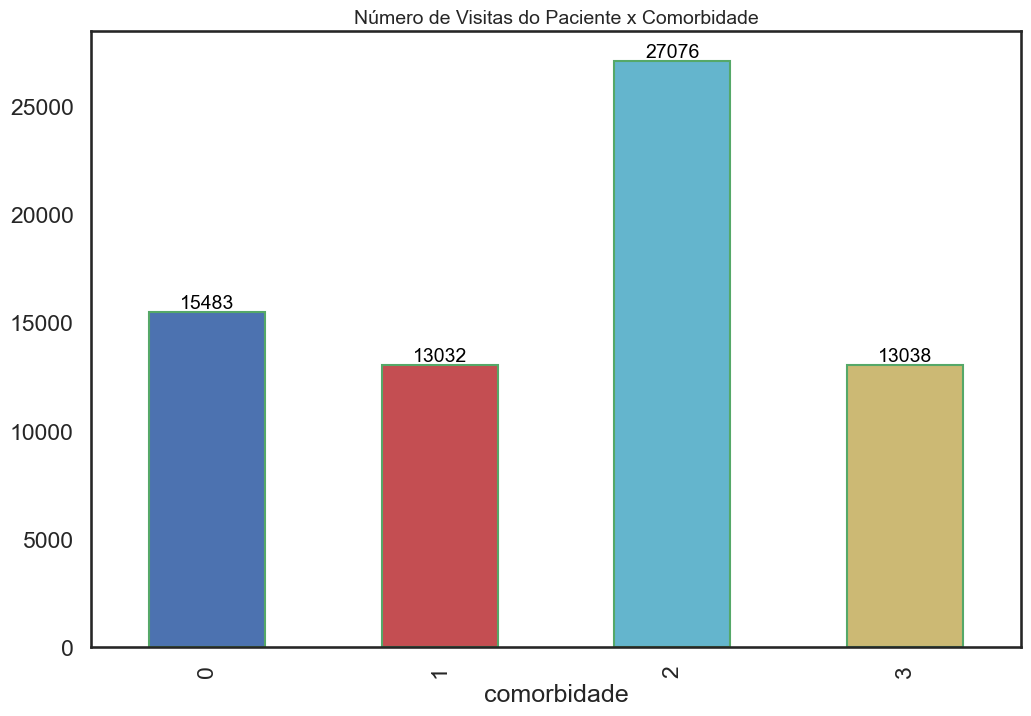

In [108]:
# Vamos remover as linhas do background
sns.set(style = "white", context = "talk")

fig = num_visitas_comorbidade.plot(kind = 'bar',
                                   figsize = (12,8), 
                                   width = 0.5,
                                   edgecolor = 'g', 
                                   color = ['b','r','c','y'],
                                   rot = 90)

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.25, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

plt.title("Número de Visitas do Paciente x Comorbidade", fontsize = 14)

plt.show()

In [109]:
# 8- Proporção de Readmissões Pelo Número de Visitas Antes da Alta

# Tabela de contingência
percent_visitas_readm = pd.crosstab(dados.number_inpatient , dados.readmitted, normalize = 'index') * 100
percent_visitas_readm

readmitted,0,1
number_inpatient,,
0,62.088788,37.911212
1,45.879397,54.120603
2,34.692557,65.307443
3,29.363450,70.636550
4,24.137931,75.862069
5,20.388350,79.611650
6,12.500000,87.500000
7,10.000000,90.000000
8,16.666667,83.333333


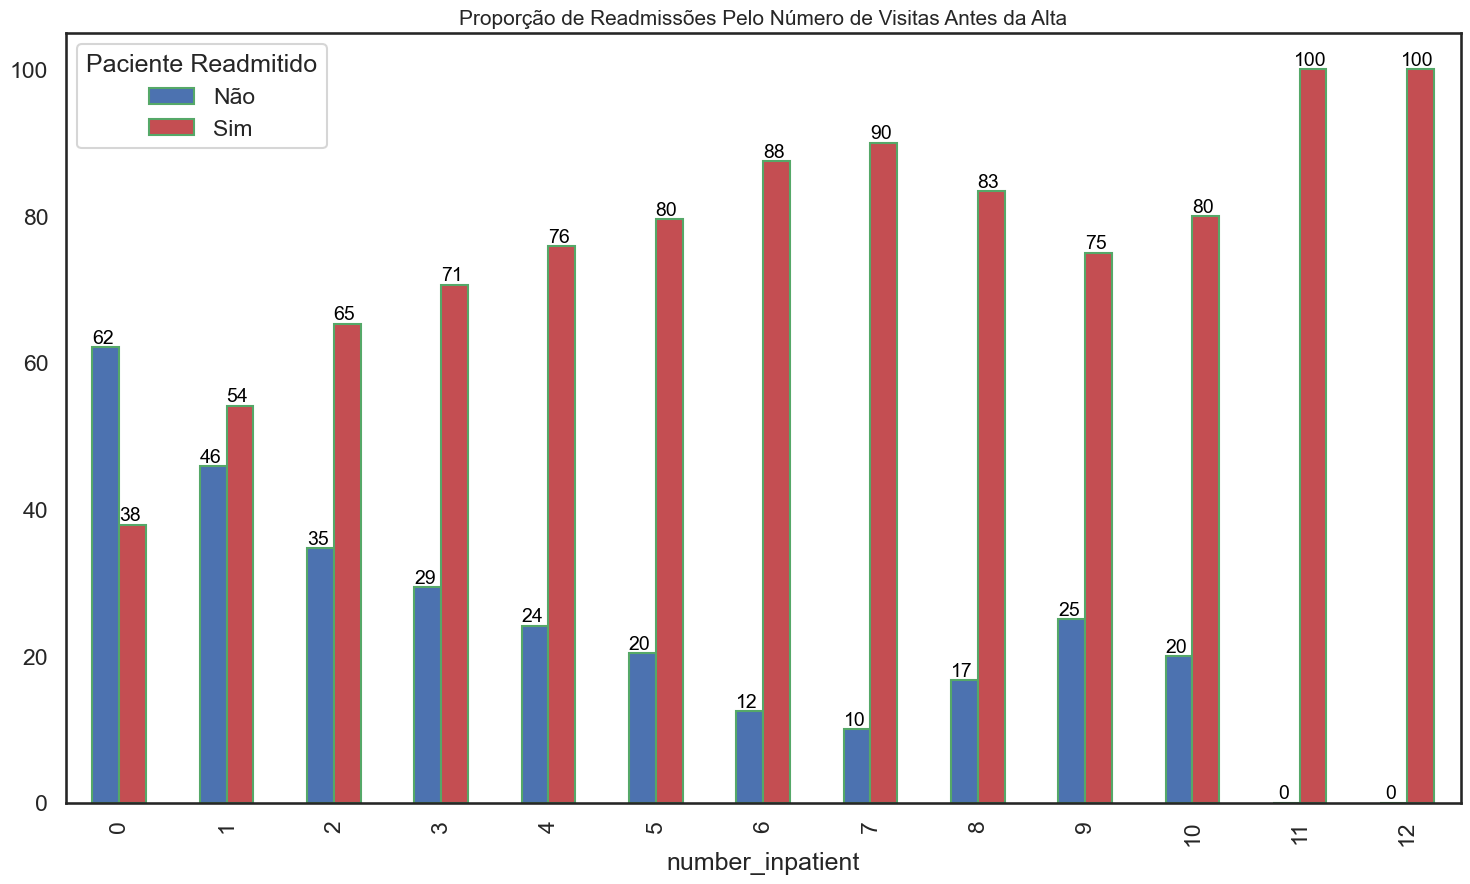

In [110]:
fig = percent_visitas_readm.plot(kind = 'bar', figsize = (18,10), width = 0.5, edgecolor = 'g', color = ['b','r'])

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.1, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

plt.title("Proporção de Readmissões Pelo Número de Visitas Antes da Alta", fontsize = 15)

fig.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

plt.show()

/var/folders/5m/c6qxj5zd3gd7wpzr5nkndcjc0000gn/T/ipykernel_4447/3762039102.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados['num_medications'], hist = True, color = 'Blue', axlabel = "Número de Medicamentos Consumidos")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Número de Medicamentos Consumidos', ylabel='Density'>

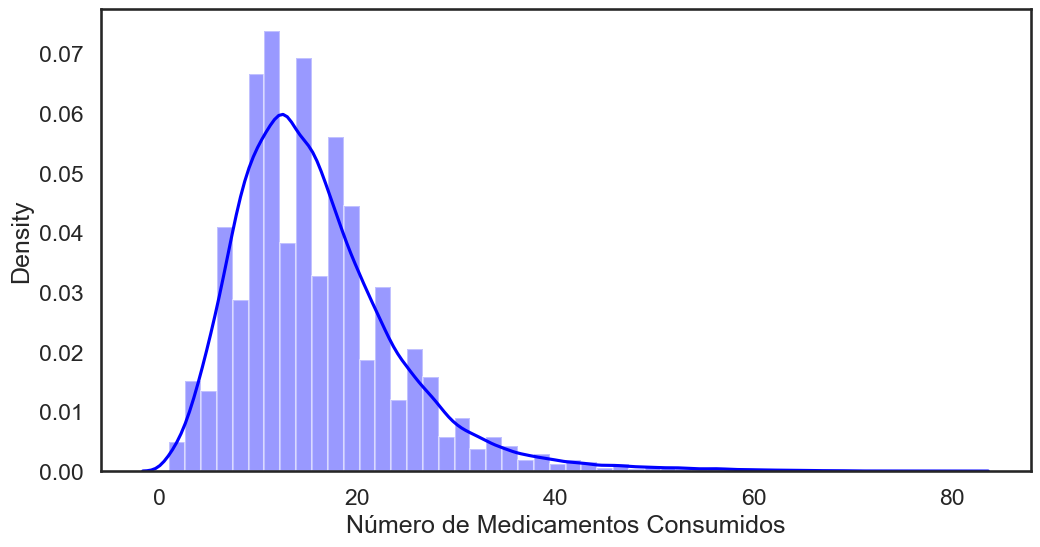

In [111]:
# 9- Gráficos Estatísticos


plt.figure(figsize = (12,6))
sns.distplot(dados['num_medications'], hist = True, color = 'Blue', axlabel = "Número de Medicamentos Consumidos")

In [112]:
# Estatísticas
dados['num_medications'].describe()

count    68629.000000
mean        15.806481
std          8.289790
min          1.000000
25%         10.000000
50%         14.000000
75%         20.000000
max         81.000000
Name: num_medications, dtype: float64

<Axes: >

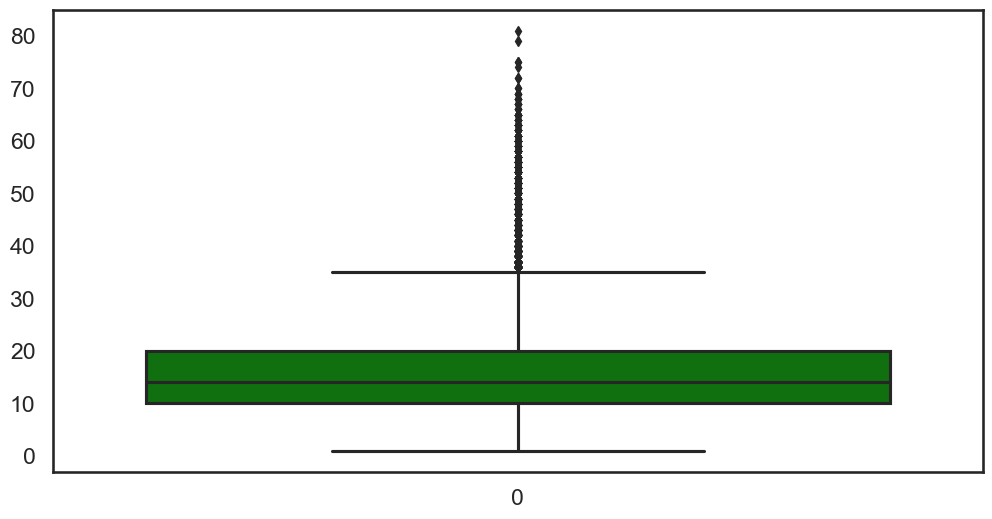

In [113]:
plt.figure(figsize = (12,6))
sns.boxplot(dados['num_medications'], color = 'Green')

<Axes: ylabel='Frequency'>

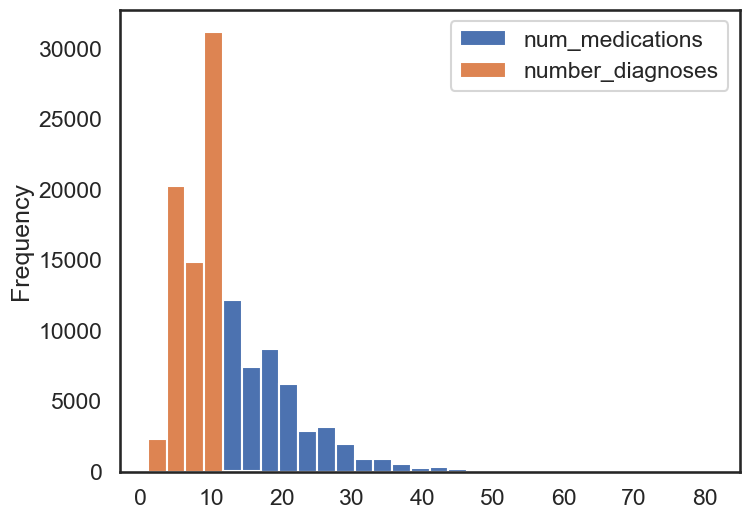

In [114]:
# Dois histogramas para duas variáveis no mesmo gráfico
dados[["num_medications", "number_diagnoses"]].plot(bins = 30, kind = "hist", figsize = (8,6))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

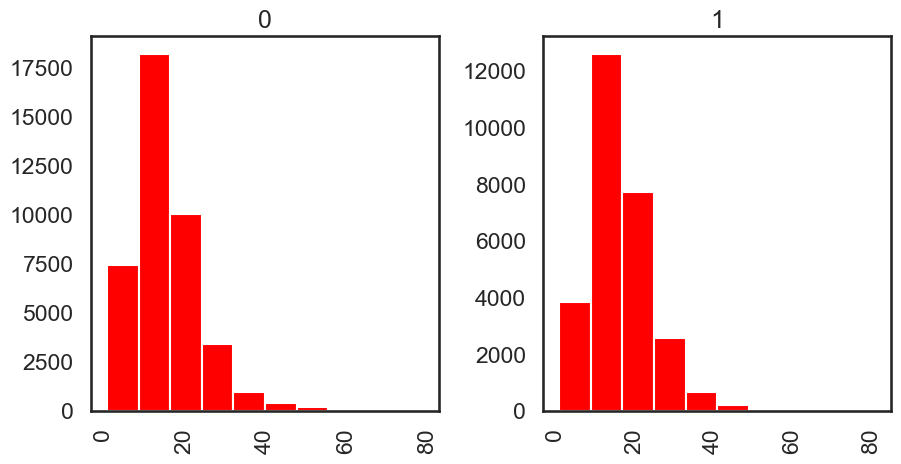

In [115]:
dados[["num_medications"]].hist(by = dados.readmitted, figsize = (10,5), color = 'Red')

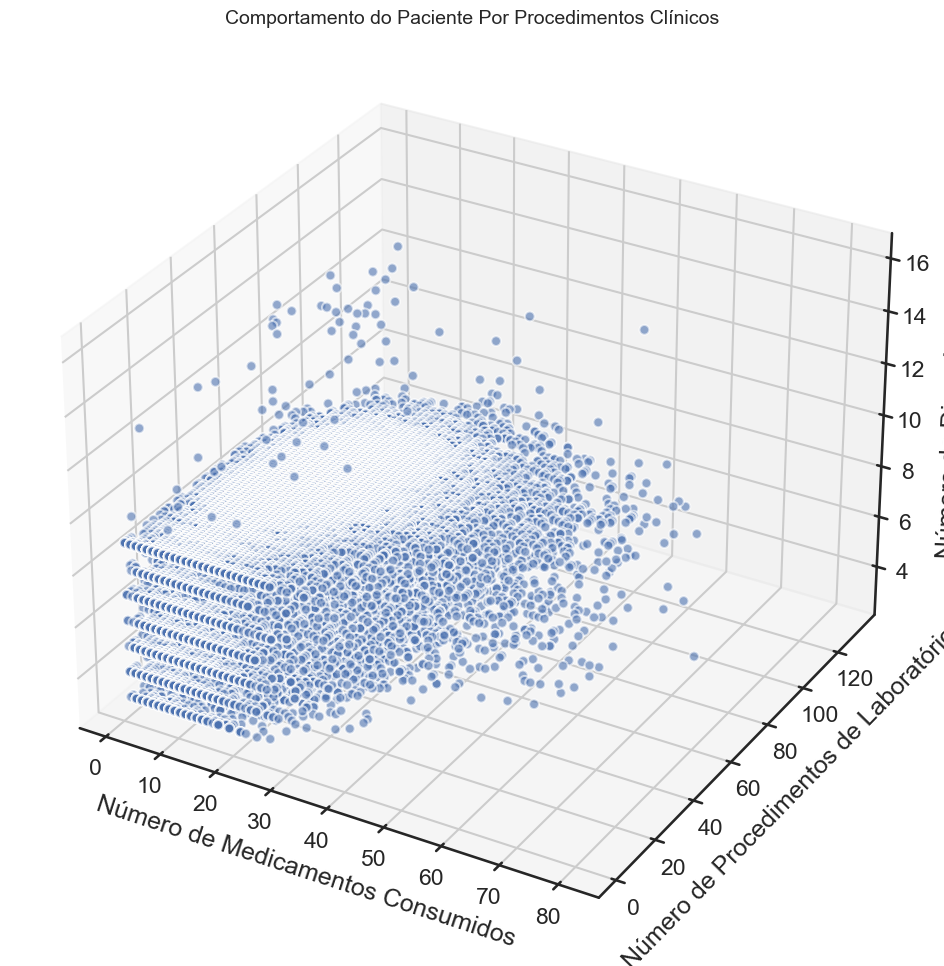

In [116]:
# Comportamento do Paciente Por Procedimentos Clínicos, Projeção 3D

# Tamanho da figura
fig = plt.figure(figsize = (14, 12))

# Subplots
ax = fig.add_subplot(111, projection = '3d')

# Dimensões
xs = dados['num_medications']
ys = dados['num_lab_procedures']
zs = dados['number_diagnoses']

# Gráfico de pontos
ax.scatter(xs, ys, zs, s = 50, alpha = 0.6, edgecolors = 'w')

# Labels
ax.set_xlabel('\nNúmero de Medicamentos Consumidos')
ax.set_ylabel('\nNúmero de Procedimentos de Laboratório')
ax.set_zlabel('\nNúmero de Diganósticos')

# Título
plt.title("Comportamento do Paciente Por Procedimentos Clínicos", fontsize = 14)

# Mostra o gráfico
plt.show()